# MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
# load the dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print('Shape of train data','x',x_train.shape,'y',y_train.shape)
print('Shape of trest data','x',x_test.shape,'y',y_test.shape)

Shape of train data x (60000, 28, 28) y (60000,)
Shape of trest data x (10000, 28, 28) y (10000,)


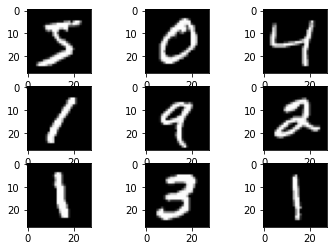

In [ ]:
#plotting few images
# images are 28x28 pixels
import matplotlib.pyplot as plt 
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
import tensorflow as tf
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# one hot encoding the output values so we can apply softmax at the end
#it will transform a integer to a 10 dim binary vector
y_train= tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
#scaling the values
# convert from integers to floats
x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
# normalize to range 0-1
x_train_norm = x_train_norm / 255.0
x_test_norm = x_test_norm / 255.0

In [ ]:
# defining the model
model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(10, activation='softmax')
])
# batch normalization is not necessary here as it is not a deep model
#compile the model
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# we can use hyperparamter tuning to find out all the best parameters but not here
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [ ]:
# evaluate a model using k-fold cross-validation
from sklearn.model_selection import KFold
def evaluate_model(dataX, dataY,model, n_folds=5):
 scores, histories = list(), list()
 # prepare cross validation
 kfold = KFold(n_folds, shuffle=True, random_state=1)
 # enumerate splits
 for train_ix, test_ix in kfold.split(dataX):
 # define model
  model = model
 # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
 # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
 # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
 # stores scores
  scores.append(acc)
  histories.append(history)
 return scores, histories

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
 for i in range(len(histories)):
 # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
 # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

> 82.175
> 83.342
> 69.775
> 73.883
> 64.425


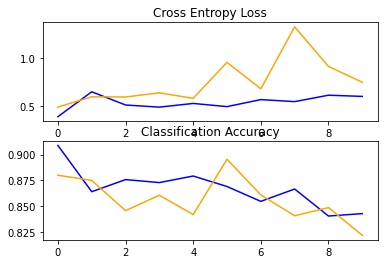

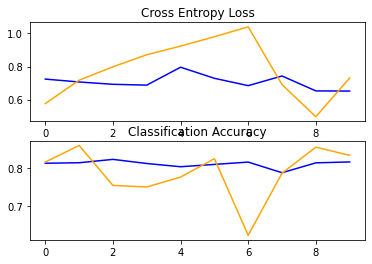

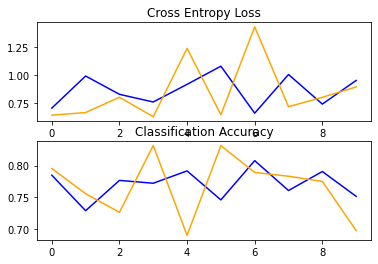

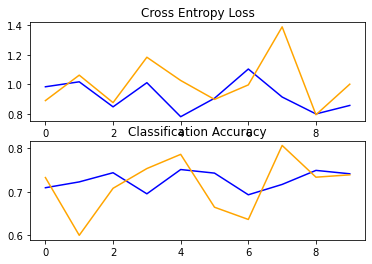

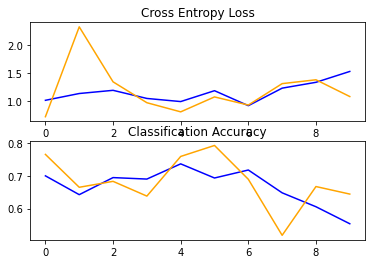

In [ ]:
# evaluate model
scores, histories = evaluate_model(x_train, y_train,model)
 # learning curves
summarize_diagnostics(histories)

In [ ]:
#performed this block of code before cross validation
history=model.fit(x_train,y_train,epochs=10,batch_size=32,verbose=3)


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [ ]:
#performed this block of code before cross validation
_,acc=model.evaluate(x_test,y_test)
print(' %.3f' % (acc * 100.0))

313/313 [==============================] - 3s 8ms/step - loss: 0.7048 - accuracy: 0.9067
 90.670


<p> We can add one more Convolutional Layer to improve the performance but I am trying to improve this model using hyperparamter  tuning.

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#creating a function to initiate model for the Keras Classifier
def create_model(learning_rate):
  model=tf.keras.models.Sequential([  
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(10, activation='softmax')
  ])
# batch normalization is not necessary here as it is not a deep model
#compile the model
  opt=tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy']) 
  return model


In [ ]:
#creating a grid list for the search
learning_rate =  [1e-1,1e-2, 1e-3, 1e-4]
grid=dict(learning_rate=learning_rate)

In [ ]:
# Hyperparamter Tuning the model  wrt only learning rate but we can do for batch and epoch number too
import scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
model_CV=KerasClassifier(model=create_model,learning_rate=0.01)
param_grid = RandomizedSearchCV(estimator=model_CV,param_distributions=grid,  cv=3)
grid_result = param_grid.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 807/1875 [===========>..................] - ETA: 21s - loss: 6.0584 - accuracy: 0.8564

In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')

Best Accuracy for 0.9126833333333333 using {'learning_rate': 0.0001}


<p> 
Hence our accuracy increased by 1.2% ,By using this paramter we can train the model again </p>

---



In [ ]:
# model prediction
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
